In [958]:
import numpy as np

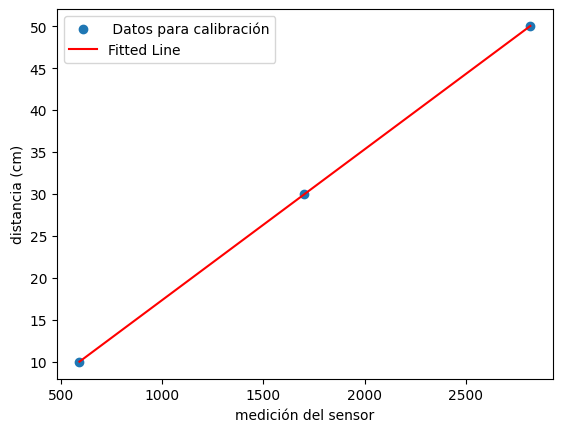

In [959]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# mediciones sensor | distancia
mediciones = np.array([590,1700,2820])
x = np.array([10,30,50])

# hacemos regresion lineal para obtener la funcion que relaciona mediciones con distancias
def linear_function(x, m, b):
    return m * x + b

params, covariance = curve_fit(linear_function, mediciones, x)
slope, intercept = params

plt.scatter(mediciones, x, label=' Datos para calibración')
plt.plot(mediciones, linear_function(mediciones, slope, intercept), color='red', label='Fitted Line')
plt.xlabel('medición del sensor')
plt.ylabel('distancia (cm)')
plt.legend()
plt.show()


In [960]:
#podemos usar esta funcion para predecir distancias a partir de mediciones
nueva_medicion =  1000
nueva_distancia = linear_function(nueva_medicion, slope, intercept)
print(nueva_distancia)

17.38424001715939


In [961]:
# sabiendo que lo que devuelve el sensor es el tiempo que tarda en ir y volver el sonido podemos calcular la velocidad del sonido
# velocidad = distancia / tiempo

# para que quede en m/s:
# pasar de microsegundo a segundos
mediciones = mediciones / 1000000
# pasar cm a metros
x = x / 100

velocidad = 2 * x / mediciones   # 2* porque es ida y vuelta

print("velocidad del sonido: ", np.mean(velocidad), "m/s")

velocidad del sonido:  348.8447187986867 m/s


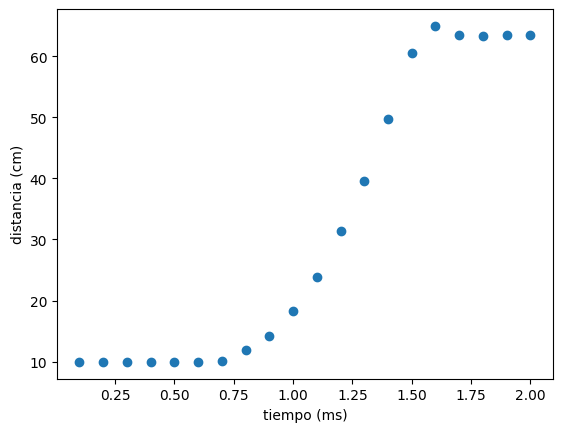

In [962]:
# hacemos lo mismo con los datos del sensor por ejemplo:
import pandas as pd

pd = pd.read_csv('./dataset/bronce_nada_.txt', sep=',', header=None)

t = pd[0].to_numpy() / 1000 # pasar de microsegundos a milisegundos
mediciones = pd[1].to_numpy()
x = linear_function(mediciones, slope, intercept)

#plot
plt.scatter(t, x, label=' Datos para calibración')
plt.xlabel('tiempo (ms)')
plt.ylabel('distancia (cm)')
plt.show()



Los valores de i y j son:  6 4 len distancias 20
shapes (10,) (10,)


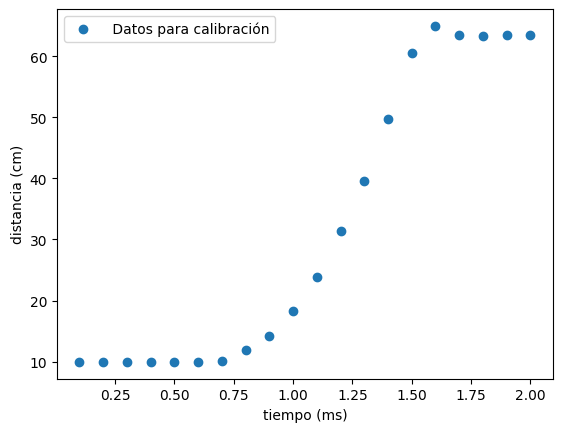

In [963]:
# veo que hay muchos tiempos demas asi que me armo una funcion que corte el principio y el final con un threshold de cambio de distancia
def cortar(tiempos,distancias,threshold):
    """dado un threshold cortar los tiempos desde el principio hasta que la diferencia en la distancia sea mayor a threshold. Lo mismo para el final"""
    for i in range(len(distancias)):
        if distancias[i+1]-distancias[i] > threshold:
            break

    # ahora desde el final hasta que la diferencia en la distancia sea mayor a threshold
    for j in range(len(distancias)):
        if distancias[-j-1]-distancias[-j-2] > threshold:
            break

    if -j == 0:
        j = 1

    if i == len(distancias) -1:
        i = 0
    print("Los valores de i y j son: ",i,j, "len distancias",len(distancias))
    print("shapes", tiempos[i:-j].shape,distancias[i:-j].shape)
    return tiempos[i:-j],distancias[i:-j]


t_cropped,x_cropped = cortar(t,x,0.55)

t_cropped = t_cropped - t_cropped[0] # para que empiece en 0

plt.scatter(t, x, label=' Datos para calibración')
plt.xlabel('tiempo (ms)')
plt.ylabel('distancia (cm)')
plt.legend()
plt.show()

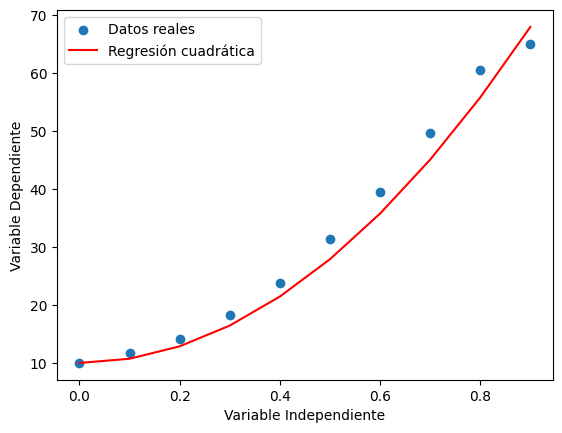

In [964]:
# sabiendo que el trineo hace mruv puedo calcular la aceleración fiteando una cuadratica a la distancia vs tiempo
from scipy.optimize import curve_fit


def get_acceleration(x,y):

    # Define the quadratic function with b fixed to 0
    def quadratic_function(x, a, c):
        return a * x**2 + c

    # Perform the quadratic fit with b fixed to 0
    initial_guess = [0.01, y[0]]  # Initial guesses for 'a' and 'c'
    params, covariance = curve_fit(quadratic_function, x, y, p0=initial_guess)

    # Extract the fitted parameters
    a, c = params

    return 2*a

a = get_acceleration(t_cropped,x_cropped)

# ahora que tengo la aceleracion puedo hacer mruv y comparar con los datos para verificar que la aceleracion es correcta
def mruv(t,a,v0,x0):
    return 0.5*a*t**2 + v0*t + x0


x_pred = mruv(t_cropped,a,0,x_cropped[0])

plt.scatter(t_cropped, x_cropped, label='Datos reales')
plt.plot(t_cropped, x_pred, color='red', label='Regresión cuadrática')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()


In [965]:
b = 72.76
s= 22.12
m= 5.37
p = 69.59
t = 108.86
nombre_to_peso = {"bronce": b, "nada": t, "protoboard":t+p, "2protoboard": t+2*p, "broncesilvermadera":b+s+m,"silvermadera":s+m, "silver":s}


codigo principal que lee cada archivo y saca lo que necesitamos

['broncesilvermadera', 'nada', 'trineo', 'madera']


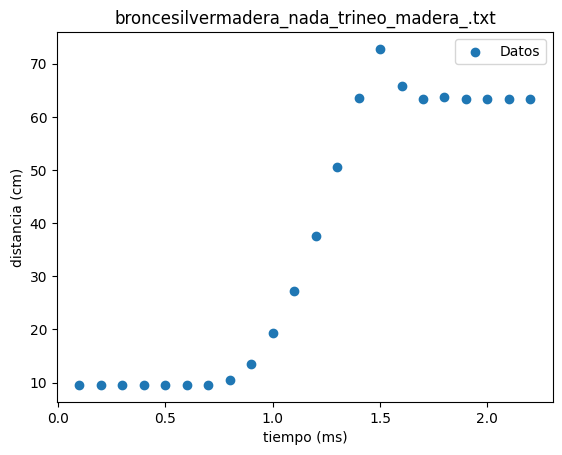

Los valores de i y j son:  6 6 len distancias 21
shapes (9,) (9,)
aceleracion 207.41969483308014


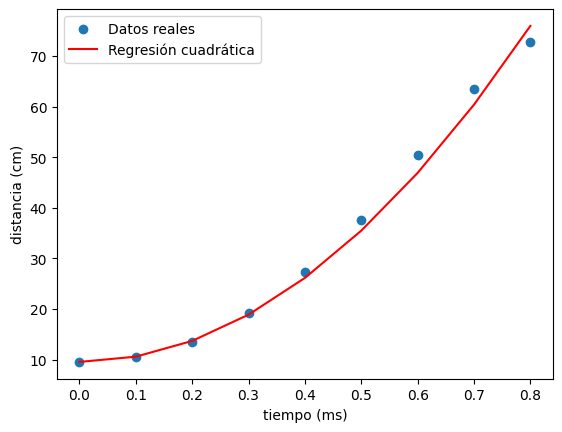

['bronce', '2protoboard', 'trineo', 'madera']


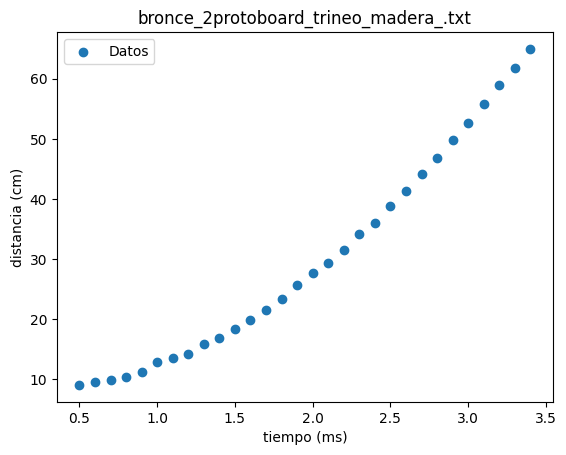

Los valores de i y j son:  3 1 len distancias 29
shapes (25,) (25,)
aceleracion 16.384410244129576


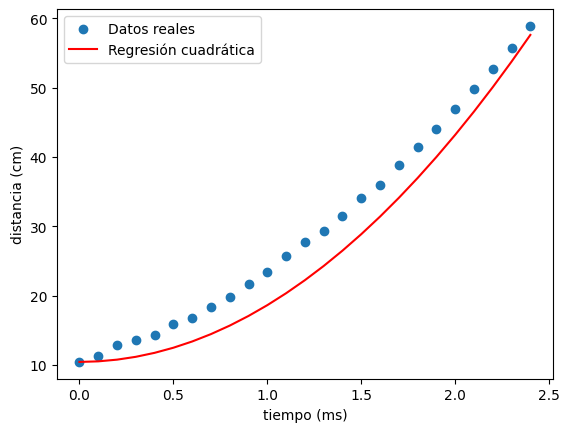

['bronce', 'nada', 'papel', 'papel']


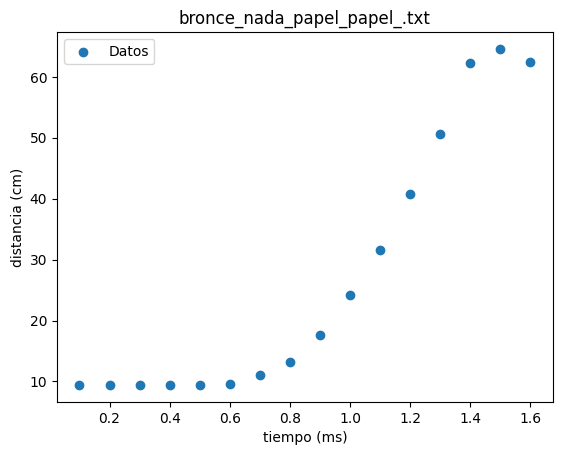

Los valores de i y j son:  5 1 len distancias 15
shapes (9,) (9,)
aceleracion 165.00459482351752


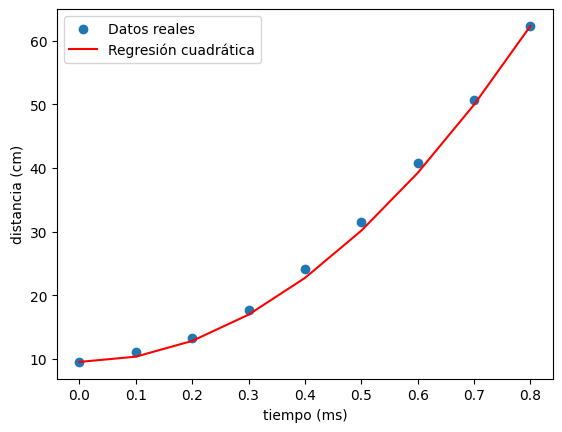

['bronce', 'nada', 'trineo', 'madera']


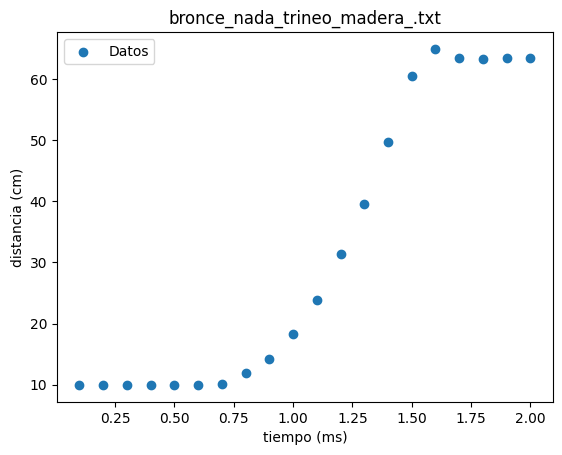

Los valores de i y j son:  6 3 len distancias 19
shapes (10,) (10,)
aceleracion 142.9330976755962


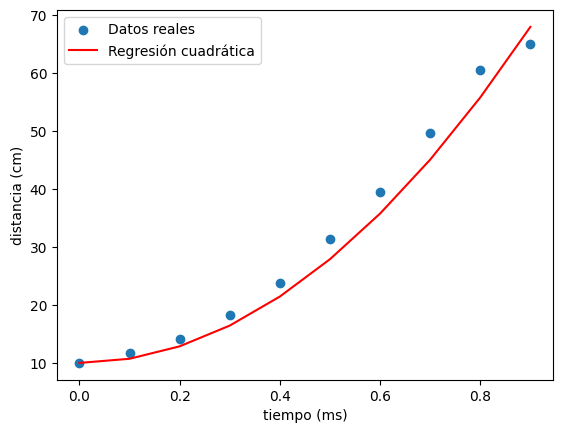

['bronce', 'nada', 'trineo', 'madera']


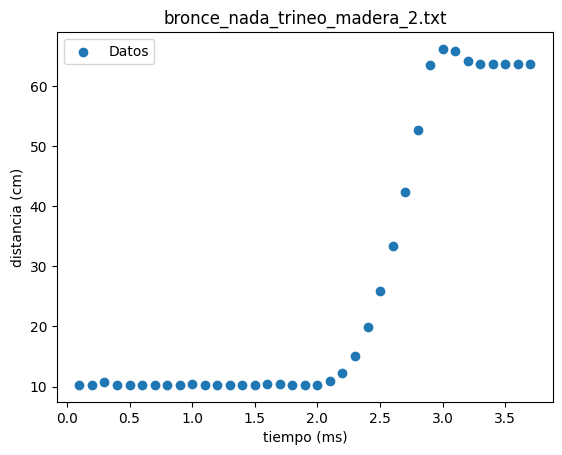

Los valores de i y j son:  19 6 len distancias 36
shapes (11,) (11,)
aceleracion 122.11809688835729


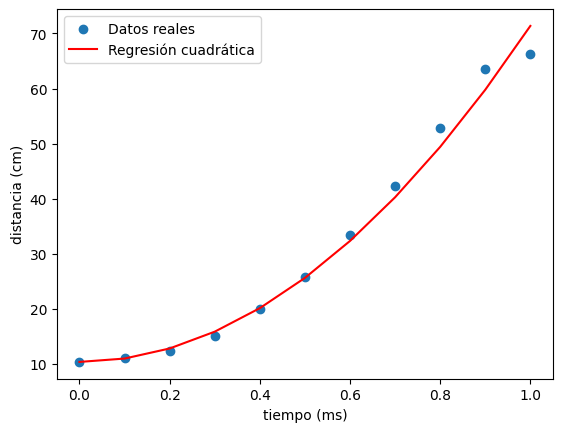

['bronce', 'nada', 'trineo', 'madera']


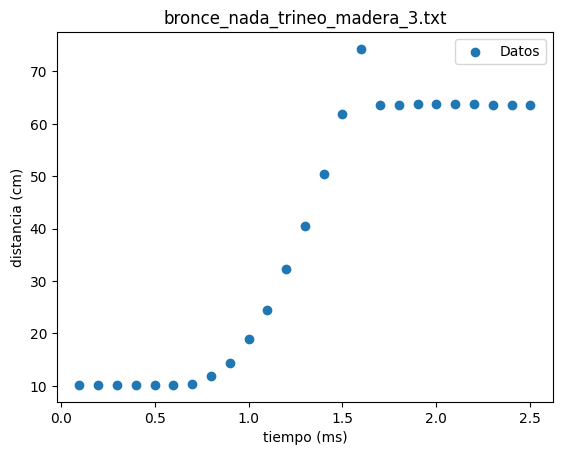

Los valores de i y j son:  6 8 len distancias 24
shapes (10,) (10,)
aceleracion 157.30989247696013


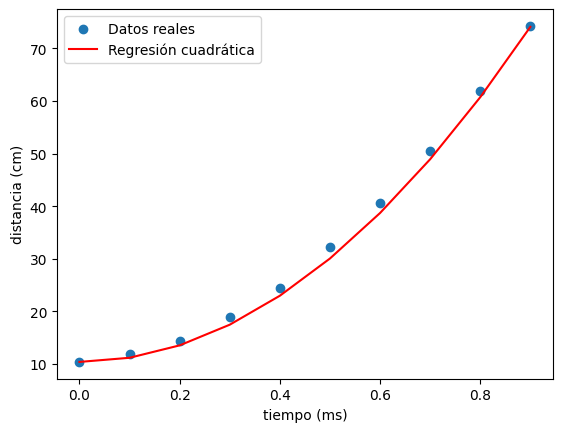

['bronce', 'nada', 'trineo', 'papel']


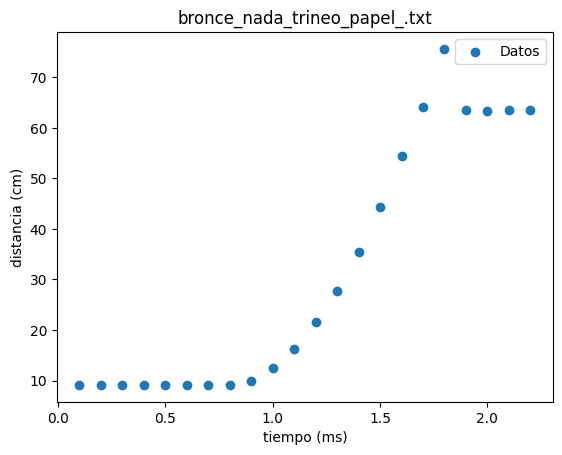

Los valores de i y j son:  7 3 len distancias 21
shapes (11,) (11,)
aceleracion 133.92167040518817


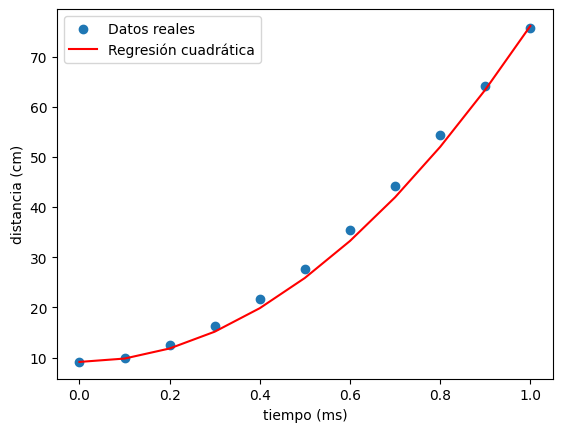

['bronce', 'protoboard', 'trineo', 'madera']


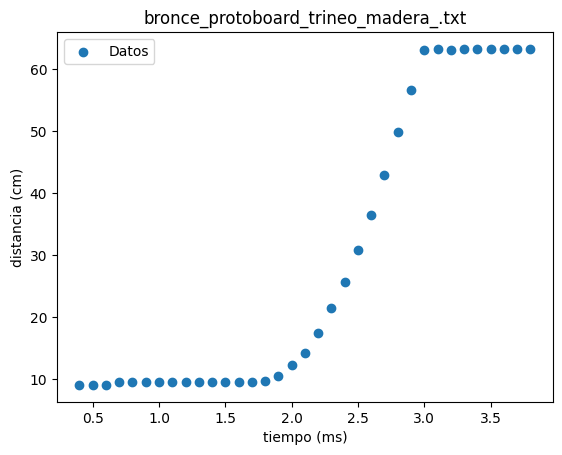

Los valores de i y j son:  14 7 len distancias 34
shapes (13,) (13,)
aceleracion 75.36328619335058


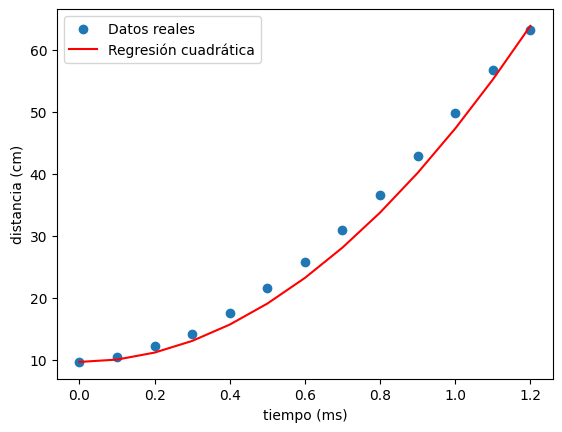

['silvermadera', 'nada', 'trineo', 'madera']


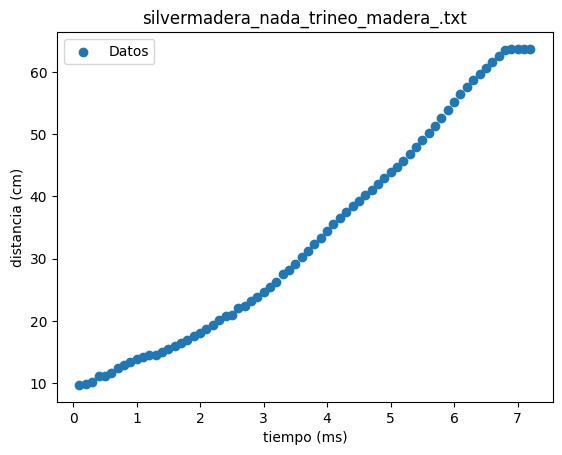

Los valores de i y j son:  2 3 len distancias 71
shapes (66,) (66,)
aceleracion 2.5177757478329768


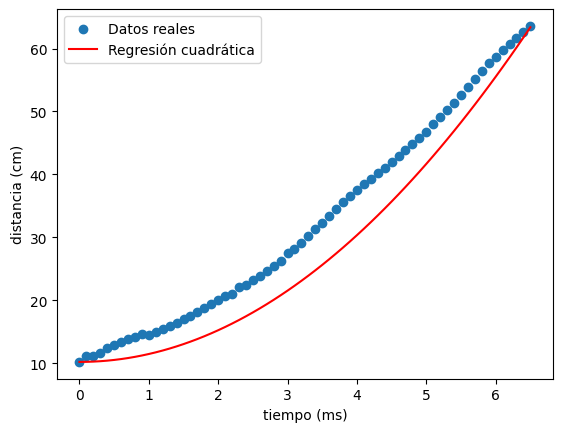

In [966]:
import os
import pandas as pd

# listas para guardar la masa y la aceleracion de cada experimento
M = []
m = []
materialTrineo = []
materialPiso = []
a = [] 

for file in os.listdir("./cropped_dataset"):
    name = file.split("_")[:-1]
    if len(name) != 4:
        raise Exception("El nombre del archivo no es valido")
    print(file.split("_")[:-1])
    #load data
    df = pd.read_csv('./cropped_dataset/'+file, sep=',', header=None)


    t = df[0].to_numpy() / 1000 # pasar de microsegundos a milisegundos
    mediciones = df[1].to_numpy()
    x = linear_function(mediciones, slope, intercept)

    # plot the data
    plt.title(file)
    plt.scatter(t, x, label='Datos')
    plt.xlabel('tiempo (ms)')
    plt.ylabel('distancia (cm)')
    plt.legend()
    plt.show()
    

    #crop data
    t_cropped,x_cropped = cortar(t[:-1],x[:-1],0.55)
    t_cropped = t_cropped - t_cropped[0] # para que empiece en 0

    #get acceleration
    acc2= get_acceleration(t_cropped, x_cropped)
    print("aceleracion",acc2)

    #plot mruv vs data
    x_pred = mruv(t_cropped,acc2,0,x_cropped[0])

    plt.scatter(t_cropped, x_cropped, label='Datos reales')
    plt.plot(t_cropped, x_pred, color='red', label='Regresión cuadrática')
    plt.xlabel('tiempo (ms)')
    plt.ylabel('distancia (cm)')
    plt.legend()
    plt.show()

    #plot acceleration
    # axs[2].scatter(t_cropped[::3][:-2], aceleraciones, label=' Datos para calibración')

    # save data
    M.append(nombre_to_peso[name[0]])
    m.append(nombre_to_peso[name[1]])
    materialTrineo.append(name[2])
    materialPiso.append(name[3])
    a.append(acc2)
    # show plot
    plt.show()


Text(0, 0.5, 'aceleracion (cm/ms^2)')

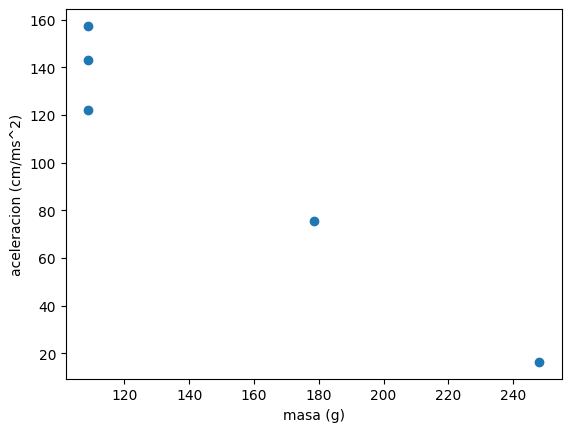

In [967]:
# plotear aceleracion vs masa con M fijo, y superficies fijas
m_filtro = []
a_filtro = []
for M in range(len(M)):
    if M[M] == nombre_to_peso["bronce"] and materialPiso[M] == "madera" and materialTrineo[M] == "trineo":
        m_filtro.append(m[M])
        a_filtro.append(a[M])

plt.scatter(m_filtro, a_filtro)
plt.xlabel("masa (g)")
plt.ylabel("aceleracion (cm/ms^2)")

In [968]:
# calculamos el mu dinamico
# de hacer las cuentas a mano sale que mu = (Mg - (m-M)a) / mg

mu = []
g = 98 # en cm/s^2
for M in range(len(M)):
    if materialPiso[M] == "madera" and materialTrineo[M] == "trineo" and a[M] < 100:
        mu.append((M[M]*g - (m[M]-M[M])*a[M]) / (m[M]*g))

print("el mu dinamico promedio para trineo madera es: ", np.mean(mu))

el mu dinamico promedio para trineo madera es:  0.1202631754261781


In [969]:
# mu para papel papel
mu = []
for M in range(len(M)):
    if materialPiso[M] == "papel" and materialTrineo[M] == "papel":
        mu.append((M[M]*g - (m[M]-M[M])*a[M]) / (m[M]*g))

print("el mu dinamico promedio para papel papel es: ", np.mean(mu))

# mu para papel trineo
mu = []
for M in range(len(M)):
    if materialPiso[M] == "papel" and materialTrineo[M] == "trineo":
        mu.append((M[M]*g - (m[M]-M[M])*a[M]) / (m[M]*g))

print("el mu dinamico promedio para papel trineo es: ", np.mean(mu))

el mu dinamico promedio para papel papel es:  0.1100284325937282
el mu dinamico promedio para papel trineo es:  0.2152087963919871


In [970]:
m[M]

108.86

In [971]:
# coeficiente estatico
# para calcular Frmax propusimos el siguiente experimento:
# fijar M y variar m hasta encontrar el limite en el que el trineo pasa de estar en reposo a moverse
# para esto pusimos sobre el trineo una botella y fuimos agregando agua hasta que el trineo no se mueva 
# luego hicimos los contrario llenamos la botella y fuimos sacando agua hasta que el trineo se mueva
# con esto obtuvimos un limite superior y un limite inferior para m

# con pesa de silver 
Masa = nombre_to_peso["silver"]


# m = 375.62 g Limite poniendo agua
m1 = 375.62
# m= 216.44 g Limite sacando agua
m2 = 216.44

mu_estatico1 = Masa / m1

mu_estatico2 = Masa / m2

print("el mu estatico superior es: ", mu_estatico2)

print("el mu estatico inferior es: ", mu_estatico1)


el mu estatico superior es:  0.10219922380336352
el mu estatico inferior es:  0.058889303019008576


tp4?

calculamos valor promedio de una magnetizacion

In [163]:
import numpy as np
def energia(matriz: np.array):
    # recorre las filas
    sumatoria = 0
    for row in range(matriz.shape[0]):
        for col in range(matriz.shape[1]):
            
            for x,y in [(-1,0),(1,0),(0,-1),(0,1)]:
                    if 0 <= row+x < matriz.shape[0] and 0 <= col+y < matriz.shape[1]:
                        # print("sumando ", matriz[row,col], matriz[row+x,col+y]) 
                        sumatoria += matriz[row,col] * matriz[row+x,col+y]
    
    return -0.5 * sumatoria
# create a random matrix with values between -10 and 10

matriz = np.random.randint(-10,10,(3,3))

print(matriz)

print(energia(matriz))

[[ -2   6  -4]
 [  4 -10  -1]
 [  3  -1   8]]
127.0


In [164]:
def magnetizacion(matriz: np.array):
    return np.sum(matriz)

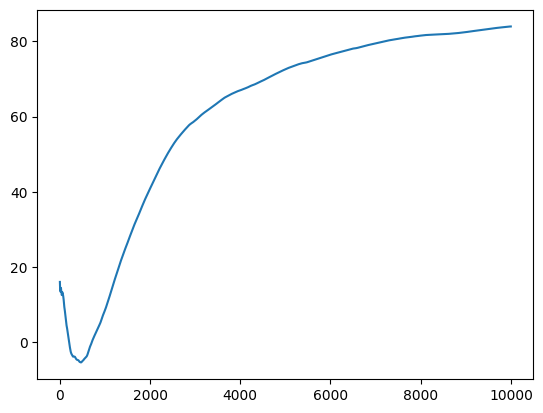

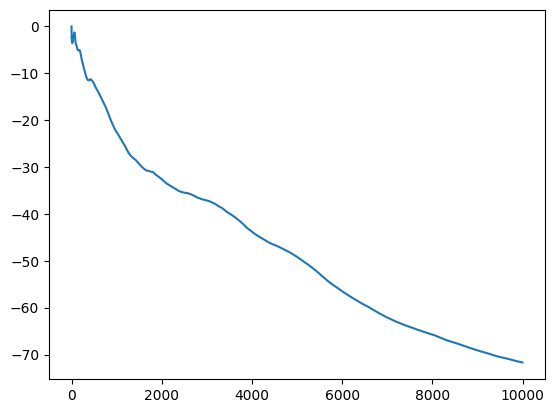

In [169]:
import matplotlib.pyplot as plt


k=1 
Temp = 1.5

size = 10  # Number of rows
def tets(k,t,size,iters):

    # Generate a random matrix of ones and minus ones
    matrix = np.random.choice([-1, 1], size=(size, size))

    magnetismo = []
    for M in range(iters):
        E1 = energia(matrix)

        #cambio un dipolo random
        pos = np.random.randint(0,size,2)
        matrix[pos[0],pos[1]] = -matrix[pos[0],pos[1]]
        E2 = energia(matrix)
        
        if E2 < E1:
            pass
        else:
            p = np.exp(-np.abs(E2-E1)/(k*Temp))

            if np.random.random() < p:
                pass
            else:
                matrix[pos[0],pos[1]] = -matrix[pos[0],pos[1]]

        magnetismo.append(magnetizacion(matrix))

    t = []
    for M in range(1,len(magnetismo)):
        t.append(np.sum(magnetismo[:M])/M)

    plt.plot(range(len(t)),t)
    plt.show()


tets(k=1,t=2,size=10,iters=10000)
tets(k=1,t=0.5,size=10,iters=10000)

- con temp > 1 tiende a 100

- con 0<temp<1 tiende a -100

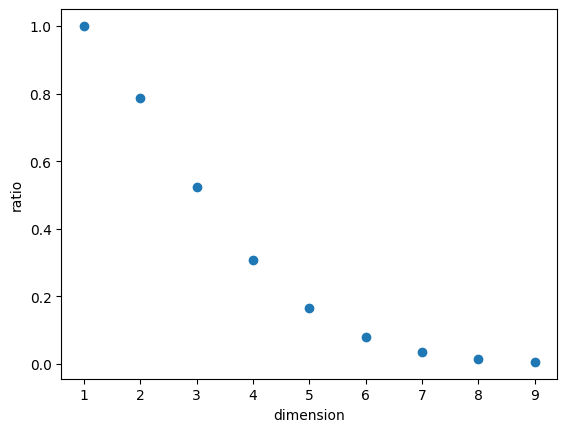

In [175]:
# monte carlo para el modelo de ising

# area de una bola n dimensional:
# https://en.wikipedia.org/wiki/Volume_of_an_n-ball

import math


def volumen_esfera(n,r):
    return np.pi**(n/2) / math.gamma(n/2 + 1) * r**n

def volumen_cubo(n,r):
    return (2*r)**n

def ratio(n,r):
    return volumen_esfera(n,r) / volumen_cubo(n,r)


# plotear el ratio para distintas dimensiones

r = 10
ratios = [ratio(n,r) for n in range(1,10)]

plt.scatter(range(1,10),ratios)
plt.xlabel("dimension")
plt.ylabel("ratio")
plt.show()


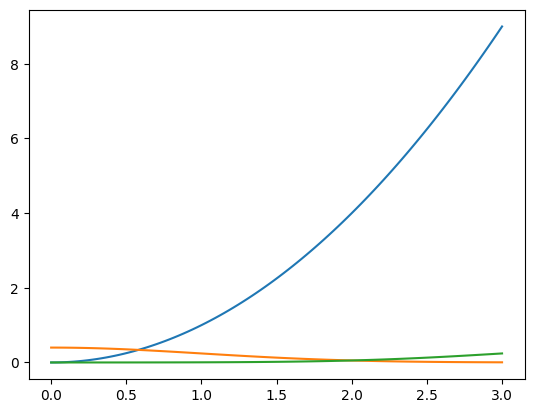

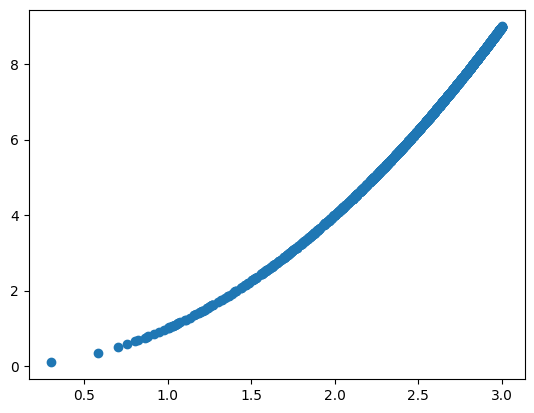

la media de f es:  3.370380221390106


In [205]:
#importance sampling

# https://en.wikipedia.org/wiki/Importance_sampling

f = lambda x: x**2

pmu, psigma = 0, 1 # parametros de la distribucion normal
p = lambda x: 1/(psigma * np.sqrt(2 * np.pi)) * np.exp( - (x - pmu)**2 / (2 * psigma**2) ) # distribucion normal



# propongo una distribucion q que sea una normal centrada en 1
qmu, qsigma = 4, 1 # parametros de la distribucion normal
q = lambda x: 1/(qsigma * np.sqrt(2 * np.pi)) * np.exp( - (x - qmu)**2 / (2 * qsigma**2) ) # distribucion normal

# plotear las dos distribuciones
x = np.linspace(0,3,100)
plt.plot(x,f(x))
plt.plot(x,p(x))
plt.plot(x,q(x))
plt.show()

# ahora quiero calcular la media de f usando importance sampling

# para esto genero N muestras de la distribucion q
N = 10000
samples = np.random.normal(qmu,qsigma,N)
# keep the ones between [0,3]
samples = samples[(samples > 0) & (samples < 3)]
# calculo el peso de cada muestra

weights = p(samples) / q(samples)

plt.scatter(samples,f(samples))
plt.show()
#plot as histogram
# plt.hist(samples,weights=weights,bins=100)
plt.show()
# calculo la media de f
print("la media de f es: ", np.mean(weights*f(samples)))

In [200]:
# promedio de f entre 0 y 3 


la media de f es:  3.028325951269662
